# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output_layer")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr = lr, nesterov = True, momentum = MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics = ["accuracy"], optimizer = optimizer)
    
    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data = (x_test, y_test),
              shuffle = True)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = 'exp-lr-%s' % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with LR = 0.100000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 27/50
50000/50000 [==============================] - 12s 239us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 12s 239us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 12s 242us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 12s 239us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 12s 241us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 12s 240us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 12s 235us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

50000/50000 [==============================] - 13s 251us/step - loss: 0.7976 - acc: 0.7135 - val_loss: 1.4348 - val_acc: 0.5395
Epoch 28/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.7741 - acc: 0.7230 - val_loss: 1.5213 - val_acc: 0.5236
Epoch 29/50
50000/50000 [==============================] - 13s 255us/step - loss: 0.7539 - acc: 0.7296 - val_loss: 1.5321 - val_acc: 0.5304
Epoch 30/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.7359 - acc: 0.7360 - val_loss: 1.5464 - val_acc: 0.5410
Epoch 31/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.7045 - acc: 0.7443 - val_loss: 1.5902 - val_acc: 0.5288
Epoch 32/50
50000/50000 [==============================] - 13s 254us/step - loss: 0.6824 - acc: 0.7562 - val_loss: 1.6504 - val_acc: 0.5220
Epoch 33/50
50000/50000 [==============================] - 12s 249us/step - loss: 0.6645 - acc: 0.7601 - val_loss: 1.6214 - val_acc: 0.5324
Epoch 34/50
50000/50000 [=======

50000/50000 [==============================] - 13s 262us/step - loss: 1.1624 - acc: 0.5916 - val_loss: 1.3537 - val_acc: 0.5185
Epoch 28/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.1478 - acc: 0.5968 - val_loss: 1.3536 - val_acc: 0.5207
Epoch 29/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.1329 - acc: 0.6014 - val_loss: 1.3599 - val_acc: 0.5206
Epoch 30/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.1215 - acc: 0.6054 - val_loss: 1.3388 - val_acc: 0.5258
Epoch 31/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.1081 - acc: 0.6106 - val_loss: 1.3512 - val_acc: 0.5214
Epoch 32/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.0960 - acc: 0.6155 - val_loss: 1.3261 - val_acc: 0.5307
Epoch 33/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.0821 - acc: 0.6205 - val_loss: 1.3969 - val_acc: 0.5122
Epoch 34/50
50000/50000 [=======

50000/50000 [==============================] - 32s 638us/step - loss: 1.6678 - acc: 0.4191 - val_loss: 1.6673 - val_acc: 0.4184
Epoch 28/50
50000/50000 [==============================] - 32s 642us/step - loss: 1.6610 - acc: 0.4210 - val_loss: 1.6603 - val_acc: 0.4216
Epoch 29/50
50000/50000 [==============================] - 31s 625us/step - loss: 1.6545 - acc: 0.4230 - val_loss: 1.6539 - val_acc: 0.4228
Epoch 30/50
50000/50000 [==============================] - 32s 646us/step - loss: 1.6479 - acc: 0.4268 - val_loss: 1.6478 - val_acc: 0.4271
Epoch 31/50
50000/50000 [==============================] - 32s 637us/step - loss: 1.6413 - acc: 0.4283 - val_loss: 1.6452 - val_acc: 0.4261
Epoch 32/50
50000/50000 [==============================] - 32s 633us/step - loss: 1.6358 - acc: 0.4288 - val_loss: 1.6380 - val_acc: 0.4292
Epoch 33/50
50000/50000 [==============================] - 33s 667us/step - loss: 1.6300 - acc: 0.4310 - val_loss: 1.6337 - val_acc: 0.4309
Epoch 34/50
50000/50000 [=======

50000/50000 [==============================] - 30s 598us/step - loss: 2.0254 - acc: 0.2830 - val_loss: 2.0222 - val_acc: 0.2899
Epoch 28/50
50000/50000 [==============================] - 32s 640us/step - loss: 2.0199 - acc: 0.2854 - val_loss: 2.0168 - val_acc: 0.2918
Epoch 29/50
50000/50000 [==============================] - 29s 581us/step - loss: 2.0145 - acc: 0.2882 - val_loss: 2.0115 - val_acc: 0.2950
Epoch 30/50
50000/50000 [==============================] - 28s 559us/step - loss: 2.0092 - acc: 0.2921 - val_loss: 2.0065 - val_acc: 0.2976
Epoch 31/50
50000/50000 [==============================] - 29s 577us/step - loss: 2.0041 - acc: 0.2947 - val_loss: 2.0015 - val_acc: 0.3008
Epoch 32/50
50000/50000 [==============================] - 32s 634us/step - loss: 1.9992 - acc: 0.2965 - val_loss: 1.9966 - val_acc: 0.3022
Epoch 33/50
50000/50000 [==============================] - 30s 600us/step - loss: 1.9943 - acc: 0.3006 - val_loss: 1.9919 - val_acc: 0.3043
Epoch 34/50
50000/50000 [=======

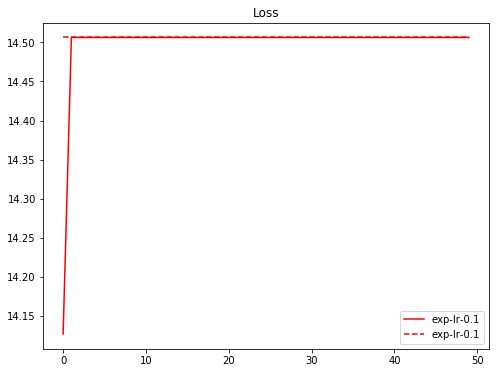

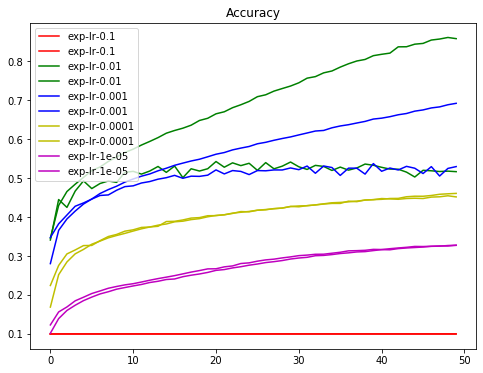

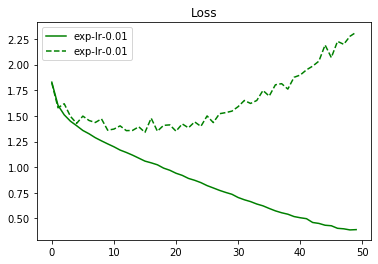

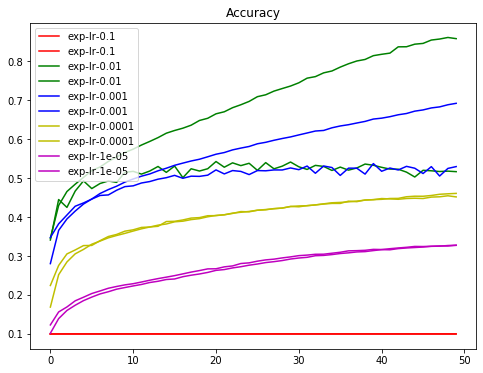

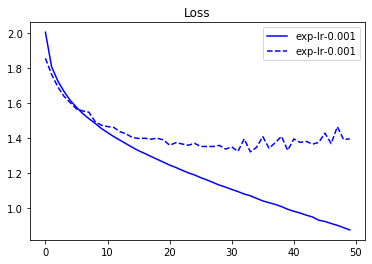

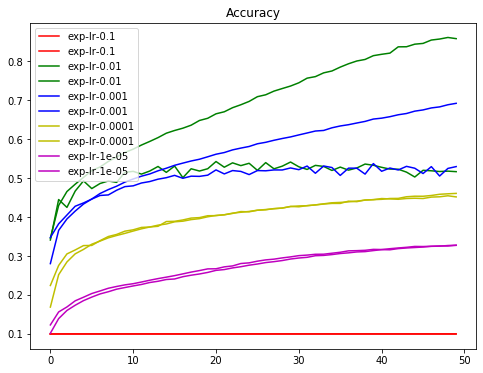

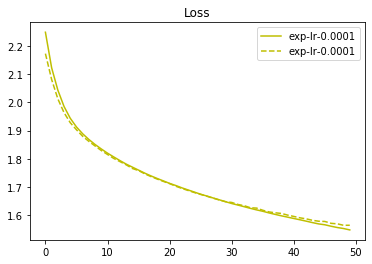

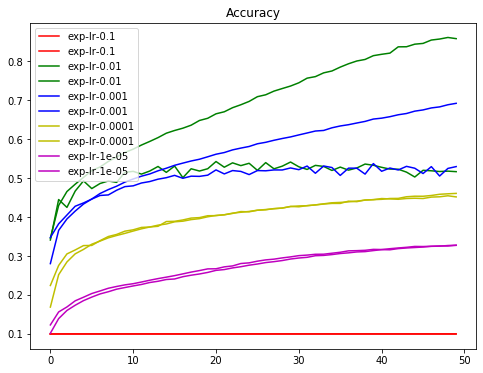

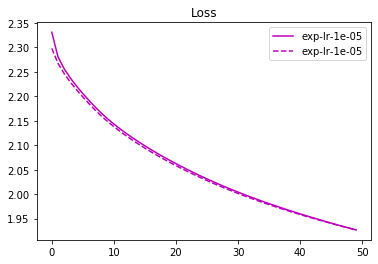

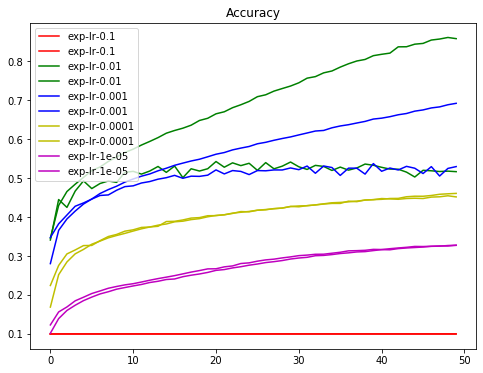

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label = cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '-', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()